# Ejercicio 1

## Punto A
Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1.
(a) Sean 𝑋 ∼ U (0, 1) y 𝑌 := 𝑓 (𝑋). Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y aplicar la
función 𝑓 a cada muestra para calcular 𝑦𝑖 = 𝑓 (𝑥𝑖), con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de
la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y calcular,
para cada 𝑖 ∈ {1, . . . , 𝑛},
𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).

  Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛}.

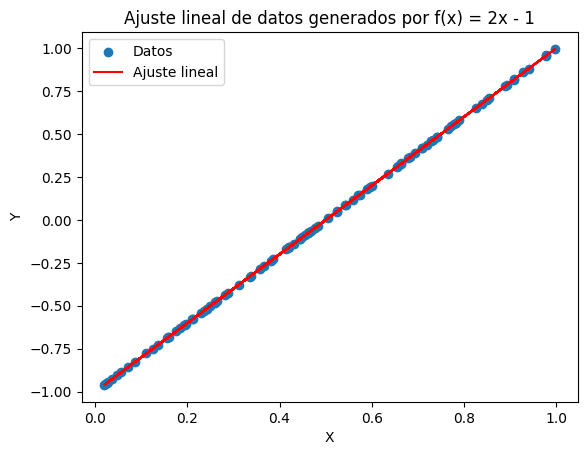

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x - 1

n = 100
X = np.random.uniform(0, 1, n).reshape(-1, 1)

Y = f(X)

X_extended = np.hstack([X, np.ones_like(X)])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

predictions = X_extended @ beta
errors = Y - predictions

plt.scatter(X, Y, label='Datos')
plt.plot(X, predictions, color='red', label='Ajuste lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste lineal de datos generados por f(x) = 2x - 1')
plt.legend()
plt.show()

Desviación estándar de los errores: 0.0


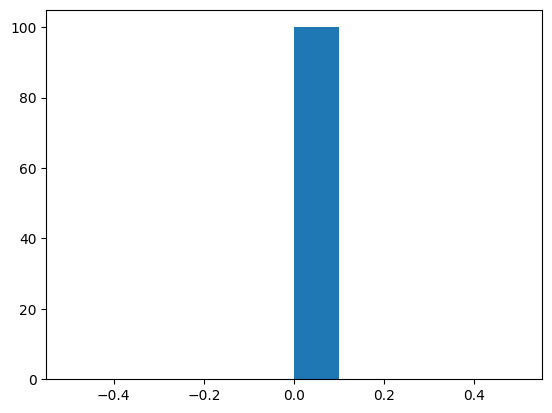

In [15]:
plt.hist(errors)
std_error = np.std(errors)
print("Desviación estándar de los errores:", std_error)

## Punto B
Sean 𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25) y 𝑌 := 𝑓 (𝑋) + 𝑍. Fijemos 𝑛 = 100. Tomar muestras
𝑥1, . . . , 𝑥𝑛 de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖
, con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste
lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados y
calcular, para cada 𝑖 ∈ {1, . . . , 𝑛},
𝜀𝑖 = 𝑦𝑖 − (𝑥𝑖𝛽1 + 𝛽0).
Describir la distribución empírica dada por {𝜀1, . . . , 𝜀𝑛} haciendo un histograma.

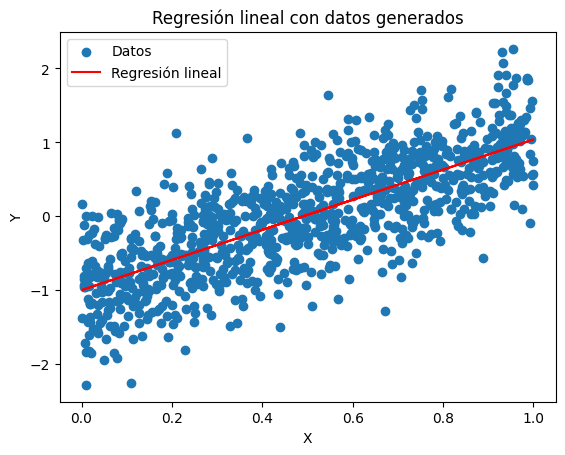

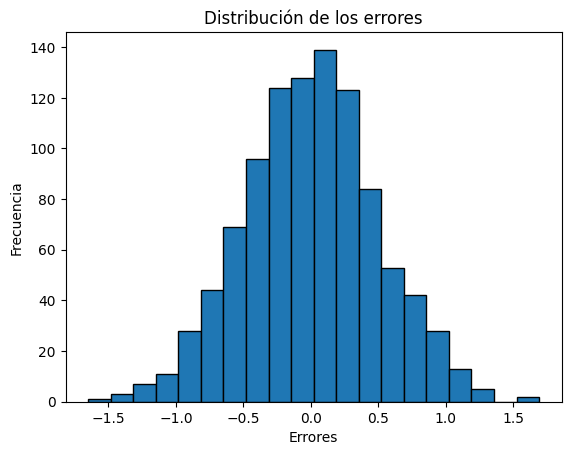

In [17]:
n = 1000
X = np.random.uniform(0, 1, n)

Z = np.random.normal(0,np.sqrt(0.25), n)

Y = f(X) + Z

X_extended = np.column_stack([X, np.ones_like(X)])
beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

predictions = X_extended @ beta
errors = Y - predictions

plt.scatter(X, Y, label='Datos')
plt.plot(X, predictions, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresión lineal con datos generados')
plt.legend()
plt.show()

plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel('Errores')
plt.ylabel('Frecuencia')
plt.title('Distribución de los errores')
plt.show()

Los errores desciben una distribución Normal

## Punto C
Repetir el paso anterior desde 𝑛 = 10 hasta 𝑛 = 1000. Graficar y estimar la media y la varianza
de 𝜀 en función de 𝑛.


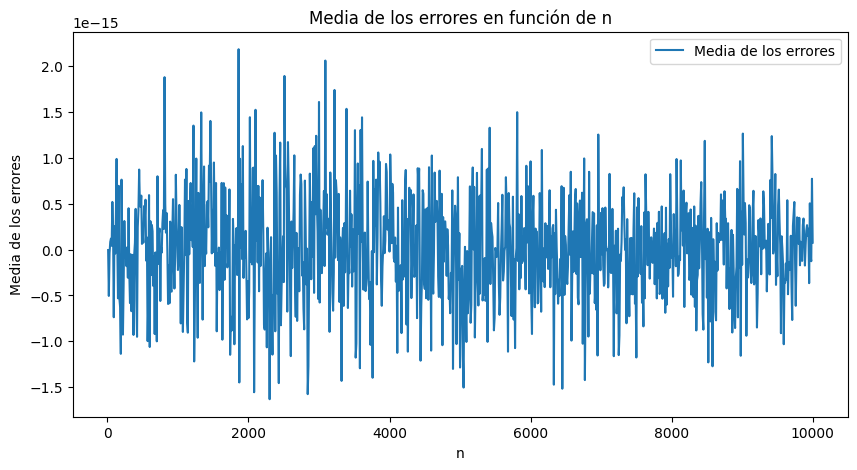

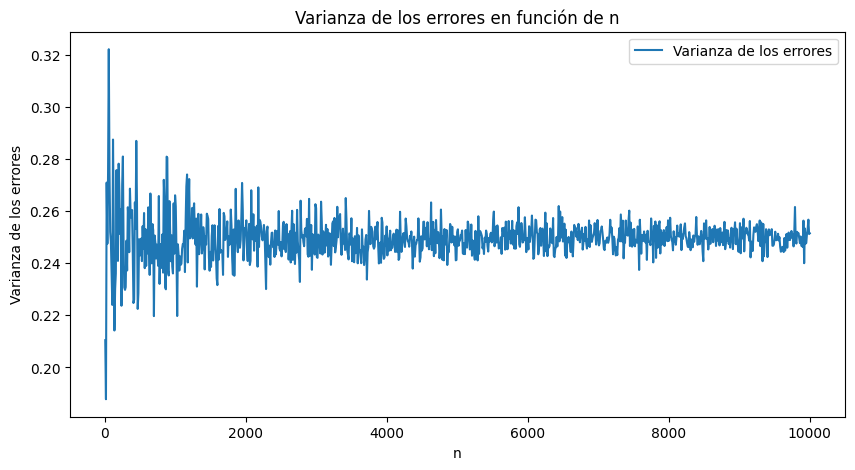

In [24]:
mean_errores = []
varianzas_errores = []

for n in range(10, 10001, 10):
    X = np.random.uniform(0, 1, n)
    Z = np.random.normal(0, np.sqrt(0.25), n)

    Y = f(X) + Z

    X_extended = np.column_stack([X, np.ones_like(X)])
    beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

    predictions = X_extended @ beta
    errors = Y - predictions

    mean_errores.append(np.mean(errors))
    varianzas_errores.append(np.var(errors))

mean_errores = np.array(mean_errores)
varianzas_errores = np.array(varianzas_errores)

plt.figure(figsize=(10, 5))
plt.plot(range(10, 10001, 10), mean_errores, label='Media de los errores')
plt.xlabel('n')
plt.ylabel('Media de los errores')
plt.title('Media de los errores en función de n')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(10, 10001, 10), varianzas_errores, label='Varianza de los errores')
plt.xlabel('n')
plt.ylabel('Varianza de los errores')
plt.title('Varianza de los errores en función de n')
plt.legend()
plt.show()


La varianza se estabiliza cuando tenemos más muestras.

# Ejercicio 2
Consideremos la función 𝑓 : R → R dada por 𝑓 (𝑥) = 2𝑥 − 1. Sean 𝑋 ∼ U (0, 1), 𝑍 ∼ N (0, .25)
y 𝑌 := 𝑓 (𝑋) + 𝑍.

## Punto A
Fijemos 𝑛 = 100. Tomar muestras 𝑥1, . . . , 𝑥𝑛 de 𝑋 y 𝑧1, . . . , 𝑧𝑛 de 𝑍 y calcular 𝑦𝑖 = 𝑓 (𝑥𝑖) + 𝑧𝑖
  ,
  con 1 ≤ 𝑖 ≤ 𝑛. Realizar un ajuste lineal de la forma 𝑌 = 𝑋 𝛽1 + 𝛽0 + 𝜖 a partir de los samples
  (𝑥1, 𝑦1), . . . , (𝑥𝑛, 𝑦𝑛) generados.

In [25]:
# Es lo mismo del ejercicio 1 ...

# Ejercicio 4
En este ejercicio, utilizaremos el dataset de automóviles disponible en el siguiente enlace:
https://archive.ics.uci.edu/static/public/9/auto+mpg.zip. Este conjunto de datos contiene información sobre varios atributos de automóviles, incluyendo Millas por galón de combustible (MPG)
y Caballos de Fuerza (HP).

## Punto A
Ajustar un modelo lineal que relacione MPG con HP utilizando todos los puntos del dataset.
Calcular el 𝑅
2 para este modelo.

In [26]:
import pandas as pd

columnas = ["mpg", "cylinders", "displacement", "horsepower", "weight",
            "acceleration", "model year", "origin", "car name"]

df = pd.read_csv("auto-mpg.data", sep= "\s+", names= columnas)

In [27]:
df = df.loc[df['horsepower'] != '?']
df['horsepower'] = df['horsepower'].astype(float)

<ipython-input-27-fa756e526b93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['horsepower'] = df['horsepower'].astype(float)


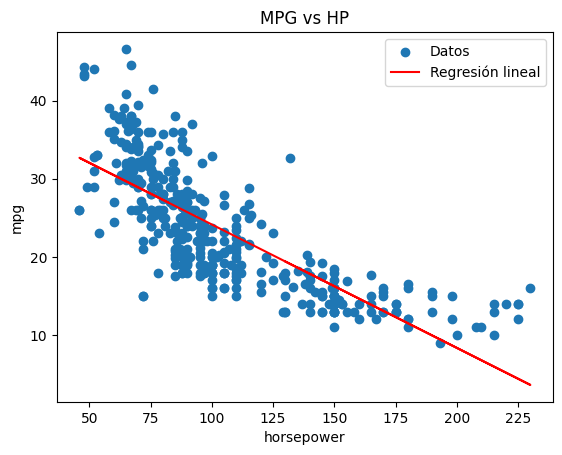

In [28]:
df.dropna(inplace=True)

HP = df[['horsepower']]
MPG = df['mpg']

HP_extended = np.column_stack([HP, np.ones_like(HP)])
beta = np.linalg.inv(HP_extended.T @ HP_extended) @ HP_extended.T @ MPG

predictions = HP_extended @ beta

plt.title('MPG vs HP')
plt.scatter(HP, MPG, label='Datos')
plt.plot(HP, predictions, color='red', label='Regresión lineal')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [30]:
residuos = MPG - predictions

RSS = np.sum(residuos**2)

TSS = np.sum((MPG - np.mean(MPG))**2)

r_cuadrado = 1 - (RSS / TSS)

print("Coeficiente de determinación R^2:", r_cuadrado)

Coeficiente de determinación R^2: 0.6059482578894348


### Punto i
 Ajustar logaritmo de MPG vs HP y calcular 𝑅
2
.

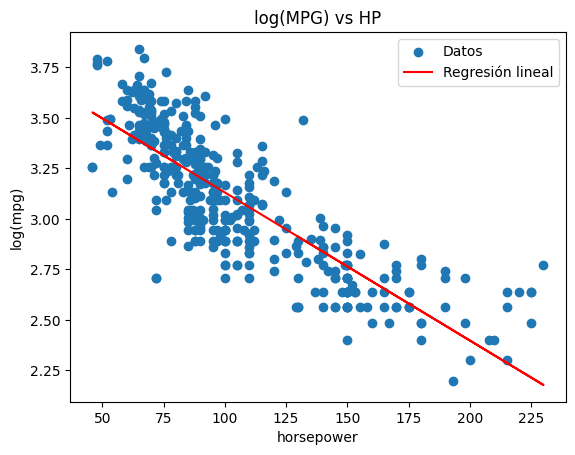

In [31]:
log_MPG = np.log(MPG)

# Lo mismo de antes pero con log_MPG
HP_extended = np.column_stack([HP, np.ones_like(HP)])
beta = np.linalg.inv(HP_extended.T @ HP_extended) @ HP_extended.T @ log_MPG

predictions = HP_extended @ beta

plt.title("log(MPG) vs HP")
plt.scatter(HP, log_MPG, label='Datos')
plt.plot(HP, predictions, color='red', label='Regresión lineal')
plt.xlabel('horsepower')
plt.ylabel('log(mpg)')
plt.legend()
plt.show()

In [32]:
residuos = log_MPG - predictions

RSS = np.sum(residuos**2)

TSS = np.sum((log_MPG - np.mean(log_MPG))**2)

r_cuadrado = 1 - (RSS / TSS)

print("Coeficiente de determinación R^2:", r_cuadrado)

Coeficiente de determinación R^2: 0.6891575108068901


### Punto ii
 Ajustar logaritmo de MPG vs logaritmo HP y calcular 𝑅
2
.

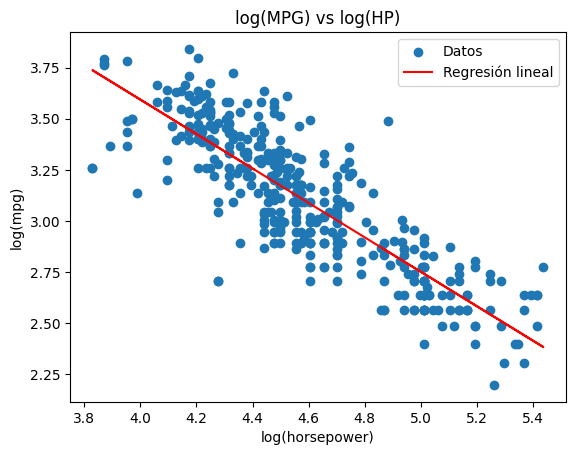

In [33]:
log_MPG = np.log(MPG)
log_HP = np.log(HP)

log_HP_extended = np.column_stack([log_HP, np.ones_like(log_HP)])
beta = np.linalg.inv(log_HP_extended.T @ log_HP_extended) @ log_HP_extended.T @ log_MPG

predictions = log_HP_extended @ beta

plt.title("log(MPG) vs log(HP)")
plt.scatter(log_HP, log_MPG, label='Datos')
plt.plot(log_HP, predictions, color='red', label='Regresión lineal')
plt.xlabel('log(horsepower)')
plt.ylabel('log(mpg)')
plt.legend()
plt.show()

In [34]:
residuos = log_MPG - predictions

RSS = np.sum(residuos**2)

TSS = np.sum((log_MPG - np.mean(log_MPG))**2)

r_cuadrado = 1 - (RSS / TSS)

print("Coeficiente de determinación R^2:", r_cuadrado)

Coeficiente de determinación R^2: 0.722696751235987


## Punto C
 Utilizando el dataset completo, realizar ajustes lineales para relacionar MPG con cada una
de las variables. Ordenar las variables de acuerdo al 𝑅
2 obtenido de la más importante a la
menos importante

In [37]:
r_cuadrados = {}
modelos = {}

for col in df.columns[1:-1]:
    atributo = df[[col]]
    MPG = df['mpg']
    log_MPG = np.log(MPG)
    log_atributo = np.log(atributo)

    atributo_extended = np.column_stack([atributo, np.ones_like(atributo)])
    log_atributo_extended = np.column_stack([log_atributo, np.ones_like(log_atributo)])

    # MPG vs atributo
    beta = np.linalg.inv(atributo_extended.T @ atributo_extended) @ atributo_extended.T @ MPG
    predictions = atributo_extended @ beta
    SSE = np.sum((MPG - predictions)**2)
    TSS = np.sum((MPG - np.mean(MPG))**2)
    r_cuadrado = 1 - (SSE / TSS)
    r_cuadrados["MPG vs " + col] = r_cuadrado
    modelos["MPG vs " + col] = (MPG, atributo, predictions)

    # log(MPG) vs atributo
    beta = np.linalg.inv(atributo_extended.T @ atributo_extended) @ atributo_extended.T @ log_MPG
    predictions = atributo_extended @ beta
    SSE = np.sum((log_MPG - predictions)**2)
    TSS = np.sum((log_MPG - np.mean(log_MPG))**2)
    r_cuadrado = 1 - (SSE / TSS)
    r_cuadrados["log(MPG) vs " + col] = r_cuadrado
    modelos["log(MPG) vs " + col] = (log_MPG, atributo, predictions)

    # log(MPG) vs log(atributo)
    beta = np.linalg.inv(log_atributo_extended.T @ log_atributo_extended) @ log_atributo_extended.T @ log_MPG
    predictions = log_atributo_extended @ beta
    RSS = np.sum((log_MPG - predictions)**2)
    TSS = np.sum((log_MPG - np.mean(log_MPG))**2)
    r_cuadrado = 1 - (RSS / TSS)
    r_cuadrados[f"log(MPG) vs log({col})"] = r_cuadrado
    modelos[f"log(MPG) vs log({col})"] = (log_MPG, log_atributo, predictions)

sorted_r_cuadrados = sorted(r_cuadrados.items(), key=lambda x: x[1], reverse=True)
sorted_r_cuadrados_dict = dict(sorted_r_cuadrados)

print(sorted_r_cuadrados_dict)

{'log(MPG) vs weight': 0.7667772617615163, 'log(MPG) vs log(weight)': 0.764769506718405, 'log(MPG) vs log(displacement)': 0.7397554555515125, 'log(MPG) vs displacement': 0.7287883888235349, 'log(MPG) vs log(horsepower)': 0.722696751235987, 'MPG vs weight': 0.6926304331206254, 'log(MPG) vs horsepower': 0.6891575108068901, 'log(MPG) vs cylinders': 0.6836383871108149, 'log(MPG) vs log(cylinders)': 0.6748720897301563, 'MPG vs displacement': 0.6482294003193044, 'MPG vs horsepower': 0.6059482578894348, 'MPG vs cylinders': 0.6046889889441245, 'MPG vs model year': 0.3370278133096227, 'log(MPG) vs model year': 0.3332462173022924, 'log(MPG) vs log(model year)': 0.3295393017753786, 'log(MPG) vs log(origin)': 0.32672399956620657, 'MPG vs origin': 0.3194609386689675, 'log(MPG) vs origin': 0.31416877279308875, 'log(MPG) vs log(acceleration)': 0.21647947536252077, 'log(MPG) vs acceleration': 0.2003227438987737, 'MPG vs acceleration': 0.1792070501562547}


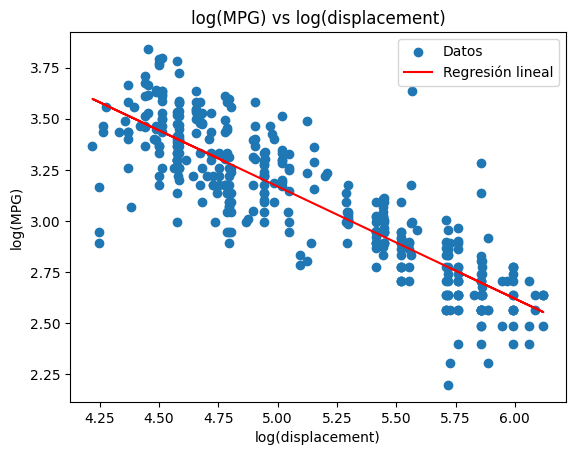

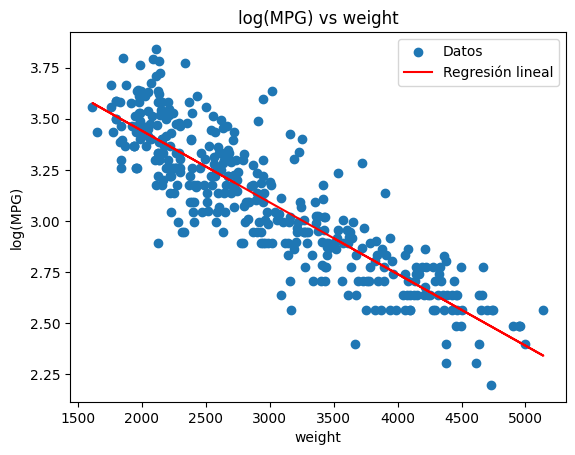

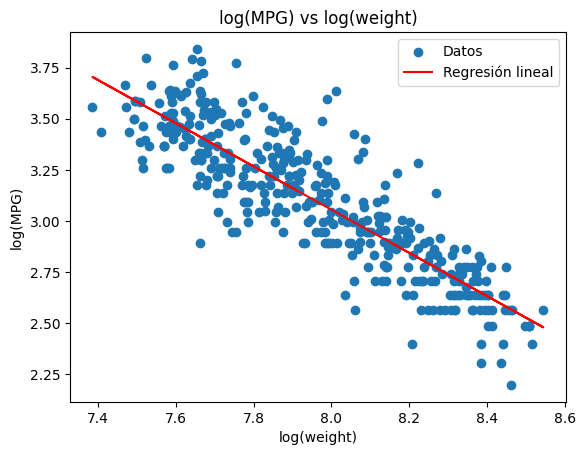

In [38]:
mejores_modelos = list(sorted_r_cuadrados_dict.keys())[:3]

for modelo in modelos.keys():
  if modelo in mejores_modelos:
    nombre_target, nombre_atributo = modelo.split(" vs ")
    target = modelos[modelo][0]
    atributo = modelos[modelo][1]
    predictions = modelos[modelo][2]
    plt.title(modelo)
    plt.scatter(atributo, target, label='Datos')
    plt.plot(atributo, predictions, color='red', label='Regresión lineal')
    plt.xlabel(nombre_atributo)
    plt.ylabel(nombre_target)
    plt.legend()
    plt.show()

# Ejercicio 5

Con el dataset del ejercicio anterior:

##Punto A
Ajustar una regresión lineal múltiple de MPG en función de todas las otras variables. Hacer
los gráficos pertinentes para analizar el comportamiento del modelo.

In [61]:
X = df.drop(['mpg', 'car name'], axis=1).values # con log da mejor r2
y = df['mpg'].values # con log da mejor r2

X_extended = np.column_stack([X, np.ones_like(X[:, 0])])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y

predictions = X_extended @ beta

residuos = y - predictions
RSS = np.sum(residuos**2)
TSS = np.sum((y - np.mean(y))**2)
r_cuadrado = 1 - (RSS / TSS)
print("Coeficiente de determinación R^2:", r_cuadrado)

Coeficiente de determinación R^2: 0.8214780764810599


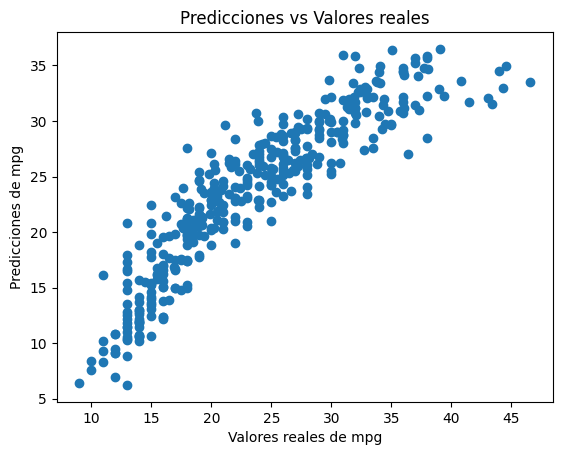

In [55]:
plt.scatter(y, predictions)
#plt.plot([y.min(), y.max()], [predictions.min(), predictions.max()], color='red', linewidth=2)
plt.xlabel('Valores reales de mpg')
plt.ylabel('Predicciones de mpg')
plt.title('Predicciones vs Valores reales')
plt.show()

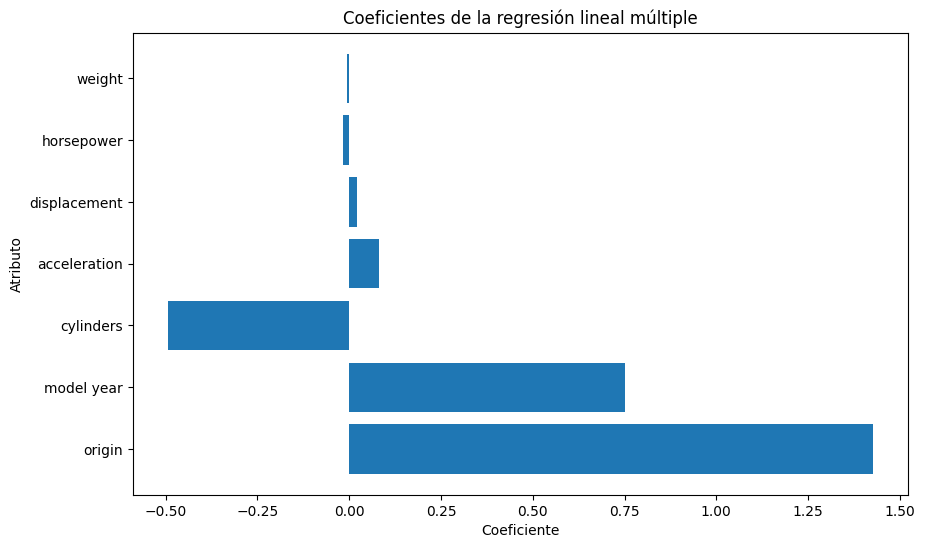

In [40]:
column_names = df.drop(['mpg', 'car name'], axis=1).columns

coef_df = pd.DataFrame({'Feature': column_names, 'Coefficient': beta[:-1]})  # Excluir el coeficiente del término de sesgo

coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'])
plt.xlabel('Coeficiente')
plt.ylabel('Atributo')
plt.title('Coeficientes de la regresión lineal múltiple')
plt.show()


## Punto B

Hacer forward selection para seleccionar el mejor modelo de regresión según el estadístico de
Mallow. Este proceso consiste en agregar una variable a la vez al modelo inicial y comparar
el valor del estadístico de Mallow para cada modelo, eligiendo el del valor más bajo

In [63]:
atributos = df.columns[1:-1]
mallow_mejor = float('inf')

y = df['mpg'].values
X_actual = np.ones((len(df), 1))  # Empiezo con la columna de unos
mejor_modelo = X_actual, None    # (X_actual, predicciones)

for atributo in atributos:
    X_nuevo = df[atributo].values.reshape(-1, 1)

    X_extendido = np.column_stack([mejor_modelo[0], X_nuevo])
    beta = np.linalg.inv(X_extendido.T @ X_extendido) @ X_extendido.T @ y

    predictions = X_extendido @ beta

    residuos = y - predictions
    RSS = np.sum(residuos ** 2)
    mallow_actual = RSS / np.var(residuos) - (len(y) - 2 * (X_extendido.shape[1]))
    if mallow_actual < mallow_mejor:
        mallow_mejor = mallow_actual
        mejor_modelo = (X_extendido, predictions)

In [58]:
predictions = mejor_modelo[1]

residuos = y - predictions
RSS = np.sum(residuos**2)
TSS = np.sum((y - np.mean(y))**2)
r_cuadrado = 1 - (RSS / TSS)
print("Coeficiente de determinación R^2:", r_cuadrado)

Coeficiente de determinación R^2: 0.6046889889441246


In [60]:
predictions.shape

(392,)

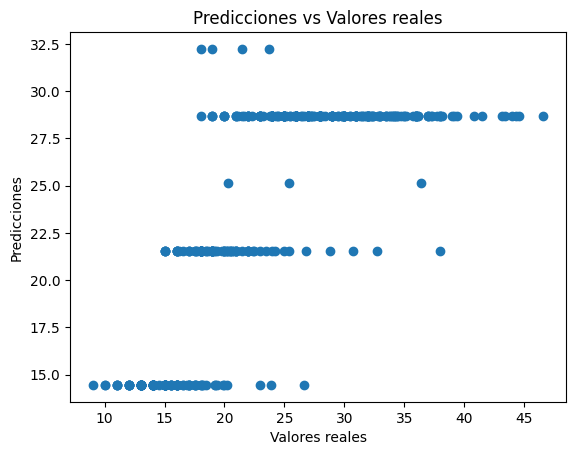

In [59]:
plt.scatter(y, predictions)
#plt.plot([y.min(), y.max()], [predictions.min(), predictions.max()], color='red', linewidth=2)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores reales')
plt.show()

## Punto C
Realizar la regresión con todas las variables, pero con regularización de Ridge y de Lasso.
Dividir el dataset en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%)
para elegir el mejor valor de 𝜆 para cada uno.

In [64]:
from sklearn.model_selection import train_test_split

X = df.drop(['mpg', 'car name'], axis=1)
y = df['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_extended = np.column_stack([X_train.values, np.ones(len(X_train))])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ y_train

predictions_train = X_extended @ beta

residuos_train = y_train - predictions_train
RSS_train = np.sum(residuos_train ** 2)
TSS_train = np.sum((y_train - np.mean(y_train)) ** 2)
r_cuadrado_train = 1 - (RSS_train / TSS_train)
print("Coeficiente de determinación R^2 en el conjunto de entrenamiento:", r_cuadrado_train)

Coeficiente de determinación R^2 en el conjunto de entrenamiento: 0.8260015786710672


In [65]:
# predicciones en el conjunto de prueba
X_test_extended = np.column_stack([X_test.values, np.ones(len(X_test))])
predictions_test = X_test_extended @ beta

residuos_test = y_test - predictions_test
RSS_test = np.sum(residuos_test ** 2)
TSS_test = np.sum((y_test - np.mean(y_test)) ** 2)
r_cuadrado_test = 1 - (RSS_test / TSS_test)
print("Coeficiente de determinación R^2 en el conjunto de prueba:", r_cuadrado_test)

Coeficiente de determinación R^2 en el conjunto de prueba: 0.7901500386760698


### Ridge

In [66]:
X_extended_train = np.column_stack([X_train.values, np.ones(len(X_train))])

alpha = 0.8

# Ridge
beta = np.linalg.inv(X_extended_train.T @ X_extended_train + alpha * np.identity(X_extended_train.shape[1])) @ X_extended_train.T @ y_train

predictions_train = X_extended_train @ beta

residuos_train = y_train - predictions_train
RSS_train = np.sum(residuos_train ** 2)
TSS_train = np.sum((y_train - np.mean(y_train)) ** 2)
r_cuadrado_train = 1 - (RSS_train / TSS_train)

print("Coeficiente de determinación R^2 en el conjunto de entrenamiento:", r_cuadrado_train)

MSE_train = np.mean((predictions_train - y_train) ** 2)
print("Error Cuadrático Medio (MSE) en el conjunto de entrenamiento:", MSE_train)


# Test
X_extended_test = np.column_stack([X_test.values, np.ones(len(X_test))])
predictions_test = X_extended_test @ beta
residuos_test = y_test - predictions_test
RSS_test = np.sum(residuos_test ** 2)
TSS_test = np.sum((y_test - np.mean(y_test)) ** 2)
r_cuadrado_test = 1 - (RSS_test / TSS_test)

print("Coeficiente de determinación R^2 en el conjunto de prueba:", r_cuadrado_test)

MSE_test = np.mean((predictions_test - y_test) ** 2)
print("Error Cuadrático Medio (MSE) en el conjunto de prueba:", MSE_test)




Coeficiente de determinación R^2 en el conjunto de entrenamiento: 0.8229494668086744
Error Cuadrático Medio (MSE) en el conjunto de entrenamiento: 11.171843319551812
Coeficiente de determinación R^2 en el conjunto de prueba: 0.7890001073607975
Error Cuadrático Medio (MSE) en el conjunto de prueba: 10.769557583853878


### Lasso

#Ejercicio 6
Generar 𝑛 = 100 samples de 𝑋1 ∼ U (0, 1), de 𝑍 ∼ N (0, 0.1) y de 𝜀 ∼ N (0, 1); a partir de ellas
generar 𝑛 samples de 𝑋2 = 0.5𝑋1 + 𝑍 y de
𝑌 = 2 + 2𝑋1 + 0.3𝑋2 + 𝜀.

In [68]:
X_1 = np.random.uniform(0,1,100)

Z = np.random.normal(0,0.1,100)

epsilon = np.random.normal(0,1,100)

X_2 = 0.5* X_1 + Z
Y = 2 + 2*X_1 + 0.3*X_2

## Punto A

Calcular la correlación entre las muestras de 𝑋1 y 𝑋2, y graficar su distribución conjunta.

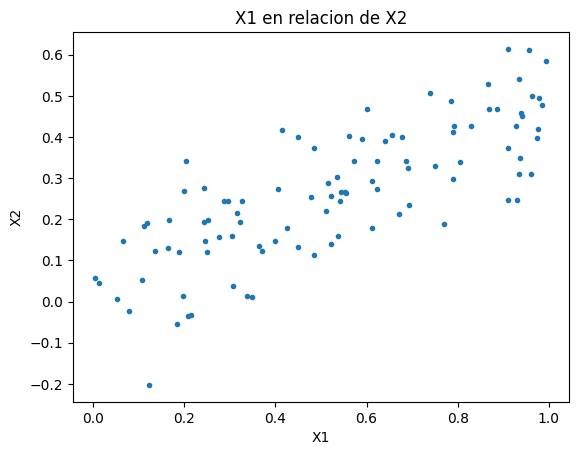

In [69]:
plt.title("X1 en relacion de X2")
plt.plot(X_1, X_2, ".")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


In [70]:
correlation_matrix = np.corrcoef(X_1, X_2)
correlation_coefficient = correlation_matrix[0, 1]

print("Correlación de Pearson:", correlation_coefficient) #0.78 hay correlación positiva

Correlación de Pearson: 0.7849681021067708


##Punto B
Ajusta un modelo de regresión lineal por mínimos cuadrados para predecir 𝑌 utilizando tanto
𝑋1 como 𝑋2. Describir los resultados obtenidos, incluyendo los coeficientes de regresión ˆ𝛽0,
ˆ𝛽1 y
ˆ𝛽2, y analizar la relación entre estos coeficientes y los verdaderos 𝛽0, 𝛽1 y 𝛽2.


In [71]:
X = np.column_stack([X_1, X_2])

X_extended = np.column_stack([X, np.ones_like(X[:, 0])])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

print("Coeficientes: ", beta) # Son iguales a los reales

Coeficientes:  [2.  0.3 2. ]


## Punto C


### i)
Ajustar un modelo de regresión lineal por mínimos cuadrados para 𝑌 y analizar resultados utilizando solo las muestras de 𝑋1

In [74]:
X = X_1.reshape(-1, 1)

X_extended = np.column_stack([X, np.ones_like(X[:, 0])])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

residuos = Y - predictions
RSS = np.sum(residuos**2)
TSS = np.sum((Y - np.mean(Y))**2)
r_cuadrado = 1 - (RSS / TSS)
print("Coeficiente de determinación R^2:", r_cuadrado)
print("Coeficientes :", beta)

Coeficiente de determinación R^2: 0.6630970103463394
Coeficientes : [2.13218548 2.00964761]


### ii)
Ajustar un modelo de regresión lineal por mínimos cuadrados para 𝑌 y analizar resultados utilizando solo las muestras de 𝑋2

In [75]:
X = X_2.reshape(-1,1)

X_extended = np.column_stack([X, np.ones_like(X[:, 0])])

beta = np.linalg.inv(X_extended.T @ X_extended) @ X_extended.T @ Y

predictions = X_extended @ beta

print("Coeficientes: ", beta)

residuos = Y - predictions
RSS = np.sum(residuos**2)
TSS = np.sum((Y - np.mean(Y))**2)
r_cuadrado = 1 - (RSS / TSS)
print("Coeficiente de determinación R^2:", r_cuadrado) # exactamente el mismo r2

Coeficientes:  [3.09686516 2.31828433]
Coeficiente de determinación R^2: 0.6630970103463394
